# MFCC

In [1]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the example clip
# y, sr = librosa.load(librosa.util.example_audio_file())
y, sr = librosa.load('./datasets/original/AIcup_testset_ok/1/1.mp3',sr=20442, offset=0.0, duration=None)

print(sr)
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512
 
# Separate harmonics and percussives into two waveforms
# y_harmonic, y_percussive = librosa.effects.hpss(y)
 
# Beat track on the percussive signal
# tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
 
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=40)
 
# And the first-order differences (delta features)
# mfcc_delta = librosa.feature.delta(mfcc)
 
# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median
# beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
#                                     beat_frames)
 
# Compute chroma features from the harmonic signal
# chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
#                                         sr=sr)
 
# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames
# beat_chroma = librosa.util.sync(chromagram,
#                                 beat_frames,
#                                 aggregate=np.median)
 
# Finally, stack all beat-synchronous features together
# beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

20442


In [3]:
len(mfcc[0])

8041

NameError: name 'beat_mfcc_delta' is not defined

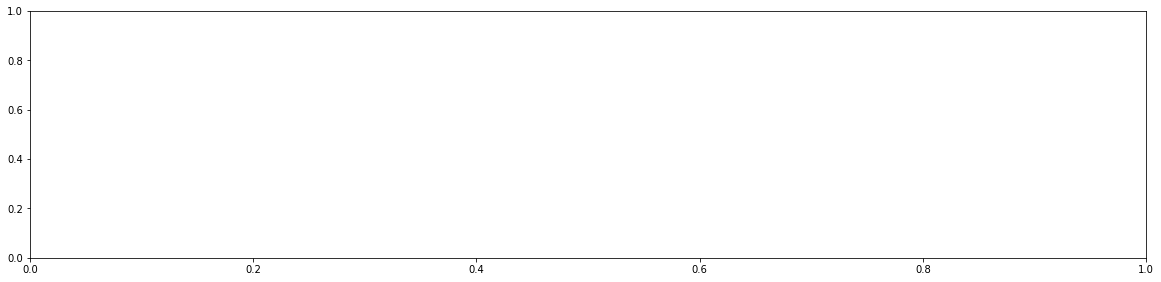

In [4]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
librosa.display.specshow(beat_mfcc_delta, y_axis='chroma')
plt.colorbar()
plt.ylabel('beat_mfcc_delta')

plt.subplot(2, 1, 2)
librosa.display.specshow(beat_features, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('beat_features')
plt.xlim([10, 20])
plt.tight_layout()

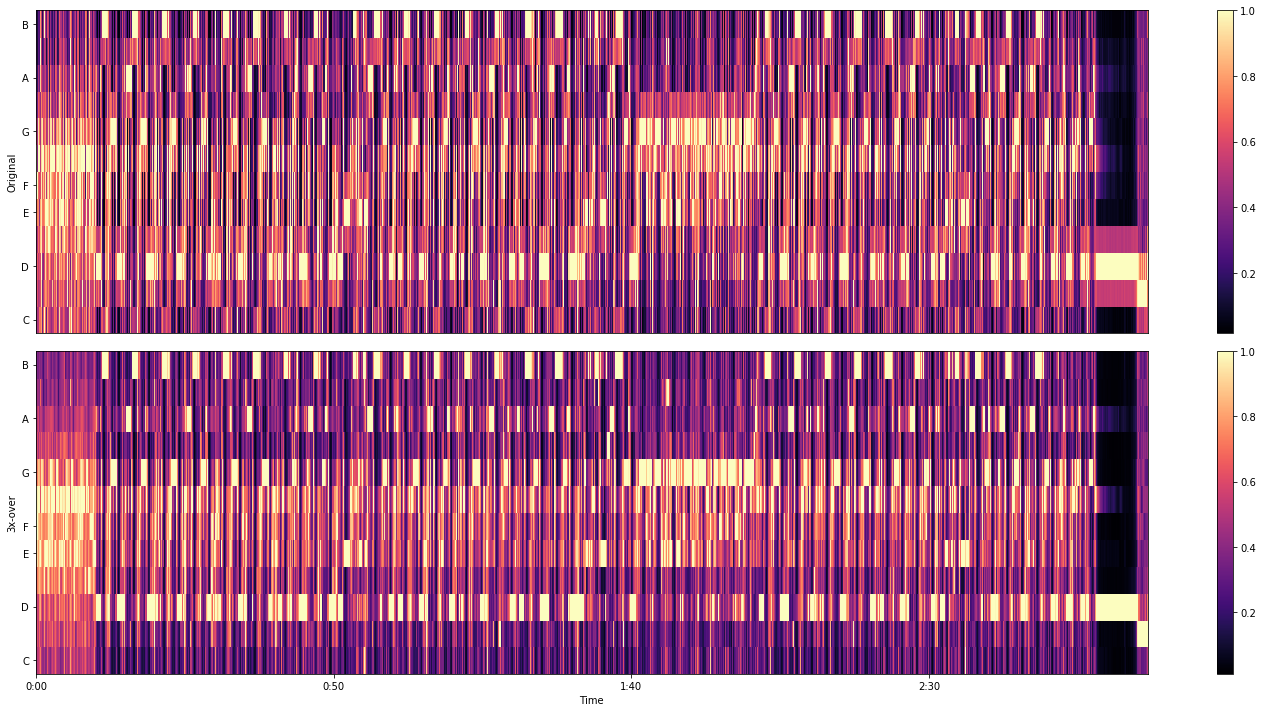

In [5]:
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_os = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=12*3)

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_orig, y_axis='chroma')
plt.colorbar()
plt.ylabel('Original')


plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_os, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('3x-over')
plt.tight_layout()

In [6]:
# y_harmonic, y_percussive = librosa.effects.hpss(y)

chroma_harmonic = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)
chroma_percussive = librosa.feature.chroma_cqt(y=y_percussive, sr=sr)

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_percussive, y_axis='chroma')
plt.colorbar()
plt.ylabel('chroma_percussive')


plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_harmonic, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('chroma_harmonic')
plt.tight_layout()

NameError: name 'y_harmonic' is not defined

In [ ]:
import scipy
chroma_filter1 = np.minimum(chroma_harmonic,
                           librosa.decompose.nn_filter(chroma_harmonic,
                                                       aggregate=np.median,
                                                       metric='cosine'))
chroma_smooth1 = scipy.ndimage.median_filter(chroma_filter1, size=(1, 9))

chroma_filter2 = np.minimum(chroma_percussive,
                           librosa.decompose.nn_filter(chroma_percussive,
                                                       aggregate=np.median,
                                                       metric='cosine'))
chroma_smooth2 = scipy.ndimage.median_filter(chroma_filter2, size=(1, 9))

plt.figure(figsize=(20, 10))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma_smooth1, y_axis='chroma')
plt.colorbar()
plt.ylabel('harmonic')
plt.xlim([20, 30])


plt.subplot(2, 1, 2)
librosa.display.specshow(chroma_smooth2, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.ylabel('percussive')
plt.tight_layout()
plt.xlim([20, 30])

In [ ]:
import matplotlib.pyplot as plt 
import librosa
import librosa.display

y, sr = librosa.load('./datasets/original/AIcup_testset_ok/1/1.mp3', sr=None)
# 提取 mel spectrogram feature
melspec = librosa.feature.melspectrogram(y, sr, n_fft=1024, hop_length=512, n_mels=128)
logmelspec = librosa.power_to_db(melspec)       # 转换为对数刻度
# 绘制 mel 频谱图
plt.figure(figsize=(20, 10))
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')        # 右边的色度条
plt.title('Beat wavform')
plt.xlim([20, 30])
plt.show()

In [ ]:
import sklearn
MFCC = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=40)
#         MFCC = librosa.feature.mfcc(y=y, sr=sr)
mfccs = sklearn.preprocessing.scale(MFCC, axis=1)

plt.figure(figsize=(20, 10))
librosa.display.specshow(mfccs, sr=sr, y_axis='linear', x_axis='time', linewidth=0.01)    
#         librosa.display.specshow(mfccs, sr=sr, y_axis='linear', x_axis='time', cmap='afmhot', linewidth=0.01)   
plt.title('Beat wavform')
plt.xlim([20, 30])
plt.ylim(0,8000)
plt.show()

In [ ]:
import essentia.standard
import essentia.streaming

# let's have a look at what is in there
print(dir(essentia.standard))

In [ ]:
hamming_window = ess.Windowing(type='hamming')
spectrum = ess.Spectrum()  # we just want the magnitude spectrum
mfcc = ess.MFCC(numberCoefficients=13)
frame_sz = 1024
hop_sz = 500

mfccs = numpy.array([mfcc(spectrum(hamming_window(frame)))[1]
               for frame in ess.FrameGenerator(x, frameSize=frame_sz, hopSize=hop_sz)])
print (mfccs.shape)